How to load the apple data

In [1]:
# To generate GIFs
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [7]:
dataset, metadata = tfds.load('cycle_gan/apple2orange', with_info=True, as_supervised=True)
train_apples, train_oranges = dataset['trainA'], dataset['trainB']
test_apples, test_oranges = dataset['testA'], dataset['testB']
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256
print(train_apples)

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [8]:
print(metadata)

tfds.core.DatasetInfo(
    name='cycle_gan',
    version=2.0.0,
    description='A dataset consisting of images from two classes A and B (For example: horses/zebras, apple/orange,...)',
    homepage='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=2528,
    splits={
        'testA': 266,
        'testB': 248,
        'trainA': 995,
        'trainB': 1019,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/ZhuPIE17,
      author    = {Jun{-}Yan Zhu and
                   Taesung Park and
                   Phillip Isola and
                   Alexei A. Efros},
      title     = {Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial
                   Networks},
      journal   = {CoRR},
      volume    = {abs/1703.10593},


NameError: name 'train_horses' is not defined

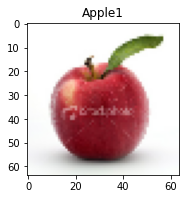

In [9]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32
train_apples = dataset['trainA']
def normalize_img(image, label):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  image = tf.image.resize(image, [64, 64])
  return image

train_apples = train_apples.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

sample_apple = next(iter(train_apples))
plt.subplot(121)
plt.title('Apple1')
plt.imshow(sample_apple[0] * 0.5 + 0.5)
sample_apple = next(iter(train_horses))
plt.subplot(122)
plt.title('Apple2')
plt.imshow(sample_apple[0] * 0.5 + 0.5)

In [6]:
# how to make animated GIF from a series of png images
import glob
from PIL import Image

# filepaths
fp_in = "image_at_epoch*.png"
fp_out = "image.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

ValueError: not enough values to unpack (expected at least 1, got 0)